In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [8]:
X_train = pd.read_csv('X_train.csv')

In [9]:
y_train = X_train['SalePrice']

In [10]:
X_train = X_train.drop(['SalePrice'],axis=1)

In [6]:
regressor = xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [7]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [8]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   35.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 17.1min finished


[21:08:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [12]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [13]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [14]:
regressor.fit(X_train,y_train)

[21:12:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [11]:
X_test = pd.read_csv('X_test.csv')

In [17]:
predictions=regressor.predict(X_test)

In [18]:
predictions

array([117890.47, 164790.22, 184531.08, ..., 159952.12, 121691.46,
       235828.55], dtype=float32)

In [19]:
Id= pd.read_csv('test.csv')['Id']

In [20]:
submission = pd.DataFrame({'Id':Id,'SalePrice':predictions})

In [21]:
submission.to_csv('Submission_file.csv',index=False)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 323))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss='mean_squared_error', optimizer='Adam')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

E:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=323, units=50, kernel_initializer="he_uniform")`
  if sys.path[0] == '':
E:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
E:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
E:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
E:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1168 samples, validate on 292 samples
Epoch 1/1000
1168/1168 [==============================] - 2s 2ms/step - loss: 28638962266.3014 - val_loss: 7964165152.4384
Epoch 2/1000
1168/1168 [==============================] - 1s 610us/step - loss: 9226051237.9178 - val_loss: 5349524141.3699
Epoch 3/1000
1168/1168 [==============================] - 1s 740us/step - loss: 6060548269.4247 - val_loss: 4678093618.4110
Epoch 4/1000
1168/1168 [==============================] - 1s 712us/step - loss: 4387407869.9178 - val_loss: 4185356636.4932
Epoch 5/1000
1168/1168 [==============================] - 1s 637us/step - loss: 3332527732.8219 - val_loss: 4124123093.9178
Epoch 6/1000
1168/1168 [==============================] - 1s 616us/step - loss: 2675679613.4795 - val_loss: 3537845130.3014
Epoch 7/1000
1168/1168 [==============================] - 1s 623us/step - loss: 2220680337.3425 - val_loss: 3510066972.4932
Epoch 8/1000
1168/1168 [==============================] - 1s 678us/step - loss: 197821

1168/1168 [==============================] - 1s 514us/step - loss: 1091440342.0959 - val_loss: 2638375978.5205
Epoch 67/1000
1168/1168 [==============================] - 1s 527us/step - loss: 1054906339.4795 - val_loss: 2961062819.7260
Epoch 68/1000
1168/1168 [==============================] - 1s 575us/step - loss: 1050188716.5890 - val_loss: 2760815126.3562
Epoch 69/1000
1168/1168 [==============================] - 1s 521us/step - loss: 1092609420.5205 - val_loss: 2611662668.2740
Epoch 70/1000
1168/1168 [==============================] - 1s 534us/step - loss: 1040853905.6712 - val_loss: 2657992579.2877
Epoch 71/1000
1168/1168 [==============================] - 1s 575us/step - loss: 1064821500.1918 - val_loss: 2567661559.7808
Epoch 72/1000
1168/1168 [==============================] - 1s 623us/step - loss: 1054876973.6438 - val_loss: 2522847728.9863
Epoch 73/1000
1168/1168 [==============================] - 1s 671us/step - loss: 1036591667.7123 - val_loss: 2507581643.2877
Epoch 74/1000


Epoch 132/1000
1168/1168 [==============================] - 0s 281us/step - loss: 844605272.6370 - val_loss: 2245796057.9178
Epoch 133/1000
1168/1168 [==============================] - 0s 301us/step - loss: 838193295.2671 - val_loss: 2188483704.0548
Epoch 134/1000
1168/1168 [==============================] - 0s 295us/step - loss: 846186116.6438 - val_loss: 2181541901.4795
Epoch 135/1000
1168/1168 [==============================] - 0s 308us/step - loss: 835795141.1027 - val_loss: 2064031699.7260
Epoch 136/1000
1168/1168 [==============================] - 0s 301us/step - loss: 832465781.5205 - val_loss: 2039539541.9041
Epoch 137/1000
1168/1168 [==============================] - 0s 294us/step - loss: 884577604.2192 - val_loss: 2141275068.8356
Epoch 138/1000
1168/1168 [==============================] - 0s 294us/step - loss: 828713262.7671 - val_loss: 1993436122.4384
Epoch 139/1000
1168/1168 [==============================] - 0s 294us/step - loss: 832954971.7740 - val_loss: 2252548854.5753


1168/1168 [==============================] - 0s 425us/step - loss: 685985917.6712 - val_loss: 1595029473.4247
Epoch 198/1000
1168/1168 [==============================] - 1s 575us/step - loss: 628669006.7945 - val_loss: 1655726669.5342
Epoch 199/1000
1168/1168 [==============================] - 1s 582us/step - loss: 645478290.1507 - val_loss: 1576503276.6027
Epoch 200/1000
1168/1168 [==============================] - 1s 897us/step - loss: 651033766.6301 - val_loss: 1632234220.9589
Epoch 201/1000
1168/1168 [==============================] - 1s 705us/step - loss: 675245244.0685 - val_loss: 1668756064.1096
Epoch 202/1000
1168/1168 [==============================] - 1s 637us/step - loss: 651402076.8082 - val_loss: 1615135729.0137
Epoch 203/1000
1168/1168 [==============================] - 1s 644us/step - loss: 633930623.4247 - val_loss: 1868852487.2329
Epoch 204/1000
1168/1168 [==============================] - 1s 678us/step - loss: 651628518.3151 - val_loss: 1767490188.0548
Epoch 205/1000


1168/1168 [==============================] - 0s 397us/step - loss: 498125970.9452 - val_loss: 1331049904.4384
Epoch 263/1000
1168/1168 [==============================] - 1s 507us/step - loss: 537541857.0753 - val_loss: 1427919522.7671
Epoch 264/1000
1168/1168 [==============================] - 1s 514us/step - loss: 542352360.9726 - val_loss: 1427977047.0342
Epoch 265/1000
1168/1168 [==============================] - 1s 507us/step - loss: 543525636.2603 - val_loss: 1402964553.4795
Epoch 266/1000
1168/1168 [==============================] - 1s 500us/step - loss: 507984812.0959 - val_loss: 1429193880.5479
Epoch 267/1000
1168/1168 [==============================] - 1s 473us/step - loss: 491359440.9178 - val_loss: 1394331366.6096
Epoch 268/1000
1168/1168 [==============================] - 1s 507us/step - loss: 503906910.1233 - val_loss: 1439689326.7483
Epoch 269/1000
1168/1168 [==============================] - 1s 459us/step - loss: 500866743.8630 - val_loss: 1673254350.4658
Epoch 270/1000


1168/1168 [==============================] - 0s 301us/step - loss: 399049534.6644 - val_loss: 1339402263.7808
Epoch 328/1000
1168/1168 [==============================] - 0s 294us/step - loss: 413240737.7192 - val_loss: 1153269425.2688
Epoch 329/1000
1168/1168 [==============================] - 0s 267us/step - loss: 406351347.4384 - val_loss: 1460842919.0137
Epoch 330/1000
1168/1168 [==============================] - 0s 260us/step - loss: 417998269.0274 - val_loss: 1228742408.6712
Epoch 331/1000
1168/1168 [==============================] - 0s 253us/step - loss: 414339800.7945 - val_loss: 1212623869.6438
Epoch 332/1000
1168/1168 [==============================] - 0s 253us/step - loss: 427165418.6301 - val_loss: 1164006789.3973
Epoch 333/1000
1168/1168 [==============================] - 1s 623us/step - loss: 416120070.5342 - val_loss: 1175276279.2329
Epoch 334/1000
1168/1168 [==============================] - 1s 616us/step - loss: 414587656.5548 - val_loss: 1169620610.5205
Epoch 335/1000


1168/1168 [==============================] - 0s 294us/step - loss: 321599587.0753 - val_loss: 1074305743.5616
Epoch 393/1000
1168/1168 [==============================] - 0s 260us/step - loss: 331877410.7808 - val_loss: 1107278836.8219
Epoch 394/1000
1168/1168 [==============================] - 0s 301us/step - loss: 364343738.3973 - val_loss: 1132990893.1781
Epoch 395/1000
1168/1168 [==============================] - 0s 267us/step - loss: 360835296.6027 - val_loss: 1043662177.0411
Epoch 396/1000
1168/1168 [==============================] - 1s 678us/step - loss: 350137915.3288 - val_loss: 1127415126.0822
Epoch 397/1000
1168/1168 [==============================] - 1s 664us/step - loss: 317098367.6918 - val_loss: 1066480612.0548
Epoch 398/1000
1168/1168 [==============================] - 1s 685us/step - loss: 318571852.1438 - val_loss: 1063533034.3014
Epoch 399/1000
1168/1168 [==============================] - 1s 616us/step - loss: 330127111.6507 - val_loss: 1060732735.2329
Epoch 400/1000


1168/1168 [==============================] - 0s 226us/step - loss: 290257642.0959 - val_loss: 979858695.1781
Epoch 458/1000
1168/1168 [==============================] - 0s 240us/step - loss: 294584700.7158 - val_loss: 966609350.4110
Epoch 459/1000
1168/1168 [==============================] - 1s 699us/step - loss: 281485760.7466 - val_loss: 1014154603.7808
Epoch 460/1000
1168/1168 [==============================] - 1s 678us/step - loss: 296001210.7705 - val_loss: 990903830.9315
Epoch 461/1000
1168/1168 [==============================] - 1s 685us/step - loss: 284758533.4041 - val_loss: 1127411858.0000
Epoch 462/1000
1168/1168 [==============================] - 1s 685us/step - loss: 299015012.7329 - val_loss: 1027596073.3699
Epoch 463/1000
1168/1168 [==============================] - ETA: 0s - loss: 335002203.439 - 1s 685us/step - loss: 334334805.7397 - val_loss: 1003175061.4795
Epoch 464/1000
1168/1168 [==============================] - 1s 678us/step - loss: 315444437.5890 - val_loss: 98

1168/1168 [==============================] - 0s 274us/step - loss: 270253180.2466 - val_loss: 1086922195.4384
Epoch 523/1000
1168/1168 [==============================] - 0s 233us/step - loss: 270593933.6781 - val_loss: 973108541.9178
Epoch 524/1000
1168/1168 [==============================] - 0s 233us/step - loss: 265461407.6986 - val_loss: 1023525380.8767
Epoch 525/1000
1168/1168 [==============================] - 1s 596us/step - loss: 268340496.0685 - val_loss: 984691193.8630
Epoch 526/1000
1168/1168 [==============================] - 1s 726us/step - loss: 251130375.0154 - val_loss: 988636681.0411
Epoch 527/1000
1168/1168 [==============================] - 1s 699us/step - loss: 265711959.4932 - val_loss: 993220703.5616
Epoch 528/1000
1168/1168 [==============================] - 1s 712us/step - loss: 264315731.0377 - val_loss: 991914153.8630
Epoch 529/1000
1168/1168 [==============================] - 1s 699us/step - loss: 267561878.1918 - val_loss: 1014670271.1507
Epoch 530/1000
1168/

Epoch 588/1000
1168/1168 [==============================] - 0s 199us/step - loss: 238570686.6918 - val_loss: 1079981712.7397
Epoch 589/1000
1168/1168 [==============================] - 0s 226us/step - loss: 288942904.1849 - val_loss: 1008099002.6849
Epoch 590/1000
1168/1168 [==============================] - 0s 226us/step - loss: 245614436.6233 - val_loss: 1009116421.8082
Epoch 591/1000
1168/1168 [==============================] - 0s 205us/step - loss: 241273241.8973 - val_loss: 1035835449.7260
Epoch 592/1000
1168/1168 [==============================] - 0s 233us/step - loss: 254675346.5000 - val_loss: 1123195836.7192
Epoch 593/1000
1168/1168 [==============================] - 0s 226us/step - loss: 249582827.2945 - val_loss: 979851398.9589
Epoch 594/1000
1168/1168 [==============================] - 0s 212us/step - loss: 236358392.4315 - val_loss: 957158942.9315
Epoch 595/1000
1168/1168 [==============================] - 0s 356us/step - loss: 267280301.3151 - val_loss: 1086477806.3562
Ep

1168/1168 [==============================] - 0s 370us/step - loss: 221065446.7637 - val_loss: 1132235649.9452
Epoch 654/1000
1168/1168 [==============================] - 0s 363us/step - loss: 223032383.6849 - val_loss: 1072742754.3562
Epoch 655/1000
1168/1168 [==============================] - 0s 356us/step - loss: 223848112.5068 - val_loss: 985401210.9041
Epoch 656/1000
1168/1168 [==============================] - 0s 363us/step - loss: 230031689.7534 - val_loss: 984066282.0274
Epoch 657/1000
1168/1168 [==============================] - 0s 336us/step - loss: 231332786.4726 - val_loss: 917525218.7945
Epoch 658/1000
1168/1168 [==============================] - 0s 301us/step - loss: 215469944.9863 - val_loss: 987270489.1507
Epoch 659/1000
1168/1168 [==============================] - 0s 301us/step - loss: 219264430.7466 - val_loss: 977305669.6986
Epoch 660/1000
1168/1168 [==============================] - 0s 322us/step - loss: 239876548.4041 - val_loss: 902215059.8904
Epoch 661/1000
1168/1

1168/1168 [==============================] - 1s 479us/step - loss: 199865973.5205 - val_loss: 957859494.9589
Epoch 720/1000
1168/1168 [==============================] - 1s 466us/step - loss: 202153145.2911 - val_loss: 906060826.0274
Epoch 721/1000
1168/1168 [==============================] - 1s 473us/step - loss: 223490989.6370 - val_loss: 902820115.4521
Epoch 722/1000
1168/1168 [==============================] - 1s 473us/step - loss: 198902693.8151 - val_loss: 913870636.1644
Epoch 723/1000
1168/1168 [==============================] - 1s 466us/step - loss: 214855887.4281 - val_loss: 919142842.9041
Epoch 724/1000
1168/1168 [==============================] - 1s 514us/step - loss: 212563291.4829 - val_loss: 937620447.7808
Epoch 725/1000
1168/1168 [==============================] - 1s 555us/step - loss: 212697679.6986 - val_loss: 916688180.3151
Epoch 726/1000
1168/1168 [==============================] - 1s 589us/step - loss: 204518658.4384 - val_loss: 1027181782.8493
Epoch 727/1000
1168/11

1168/1168 [==============================] - 0s 384us/step - loss: 195545701.4589 - val_loss: 1017016915.5616
Epoch 786/1000
1168/1168 [==============================] - 0s 370us/step - loss: 195210744.7089 - val_loss: 909808262.2466
Epoch 787/1000
1168/1168 [==============================] - 1s 514us/step - loss: 181188984.0548 - val_loss: 910266954.5205
Epoch 788/1000
1168/1168 [==============================] - 1s 507us/step - loss: 188003359.5959 - val_loss: 947911420.4658
Epoch 789/1000
1168/1168 [==============================] - 1s 514us/step - loss: 191520766.7158 - val_loss: 1083531237.6438
Epoch 790/1000
1168/1168 [==============================] - 1s 527us/step - loss: 197852645.6301 - val_loss: 903436559.3699
Epoch 791/1000
1168/1168 [==============================] - 1s 514us/step - loss: 200824224.3699 - val_loss: 1008701022.2466
Epoch 792/1000
1168/1168 [==============================] - 1s 514us/step - loss: 184269656.1130 - val_loss: 878110273.9452
Epoch 793/1000
1168/

1168/1168 [==============================] - 0s 336us/step - loss: 187644840.8493 - val_loss: 875554035.3425
Epoch 852/1000
1168/1168 [==============================] - 0s 308us/step - loss: 173636242.1644 - val_loss: 883241819.6438
Epoch 853/1000
1168/1168 [==============================] - 0s 274us/step - loss: 174791913.9760 - val_loss: 857633715.0959
Epoch 854/1000
1168/1168 [==============================] - 0s 219us/step - loss: 198717499.2432 - val_loss: 938543238.5479
Epoch 855/1000
1168/1168 [==============================] - 1s 562us/step - loss: 166177987.0685 - val_loss: 872092046.5753
Epoch 856/1000
1168/1168 [==============================] - 1s 589us/step - loss: 192967819.8185 - val_loss: 849817475.6164
Epoch 857/1000
1168/1168 [==============================] - 1s 582us/step - loss: 186386242.3459 - val_loss: 918433470.8493
Epoch 858/1000
1168/1168 [==============================] - 1s 623us/step - loss: 179699357.9452 - val_loss: 916563193.2055
Epoch 859/1000
1168/116

1168/1168 [==============================] - 0s 301us/step - loss: 185635193.5308 - val_loss: 889892420.3836
Epoch 918/1000
1168/1168 [==============================] - 0s 315us/step - loss: 167973155.6473 - val_loss: 958378010.1370
Epoch 919/1000
1168/1168 [==============================] - 1s 582us/step - loss: 163243097.3185 - val_loss: 878195708.2740
Epoch 920/1000
1168/1168 [==============================] - 1s 639us/step - loss: 165415841.9144 - val_loss: 844007782.1918
Epoch 921/1000
1168/1168 [==============================] - 1s 582us/step - loss: 170937932.8527 - val_loss: 913580418.5753
Epoch 922/1000
1168/1168 [==============================] - 1s 630us/step - loss: 166364738.6267 - val_loss: 776697898.3562
Epoch 923/1000
1168/1168 [==============================] - 1s 610us/step - loss: 190826531.5719 - val_loss: 910207933.4521
Epoch 924/1000
1168/1168 [==============================] - 1s 657us/step - loss: 177897030.3322 - val_loss: 948934055.3973
Epoch 925/1000
1168/116

1168/1168 [==============================] - 1s 596us/step - loss: 166017411.4281 - val_loss: 989969945.2055
Epoch 984/1000
1168/1168 [==============================] - 1s 575us/step - loss: 172967488.5411 - val_loss: 873828760.6849
Epoch 985/1000
1168/1168 [==============================] - 1s 438us/step - loss: 154286559.1199 - val_loss: 958909374.2603
Epoch 986/1000
1168/1168 [==============================] - 1s 459us/step - loss: 162273468.8527 - val_loss: 945154141.5890
Epoch 987/1000
1168/1168 [==============================] - 1s 445us/step - loss: 180209104.6507 - val_loss: 856357467.1233
Epoch 988/1000
1168/1168 [==============================] - 0s 411us/step - loss: 183463672.6404 - val_loss: 885371850.6301
Epoch 989/1000
1168/1168 [==============================] - 0s 363us/step - loss: 187870185.8459 - val_loss: 1167436953.5890
Epoch 990/1000
1168/1168 [==============================] - 0s 301us/step - loss: 170470926.3116 - val_loss: 890424318.6849
Epoch 991/1000
1168/11

In [19]:
history = pd.DataFrame(model_history.history)

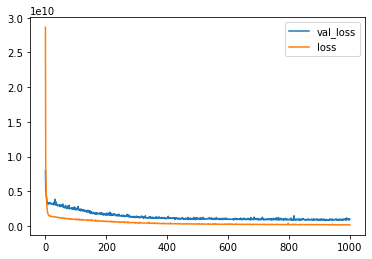

In [20]:
history.plot()

In [22]:
ANN_prediction = classifier.predict(X_test.values)

In [29]:
ANN_prediction=ANN_prediction.reshape(1459,)

In [30]:
Id= pd.read_csv('test.csv')['Id']
ANN_submission = pd.DataFrame({'Id':Id,'SalePrice':ANN_prediction})
ANN_submission.to_csv('ANN_Submission_file.csv',index=False)